# MET

## Loading the Data

In [1]:
import numpy as np
import sklearn
import pandas as pd
import preprocess2
from scipy import stats

%matplotlib inline
df, zyg_b, cor_b, zyg_s, cor_s, scl_s, scl_b, fragebogen, MET_num, MET_cat=preprocess2.get_data(base=2, 
                                                                                 zstand=1, 
                                                                                 method='subtraction', 
                                                                                 resolution=100,
                                                                                 outl='sd', 
                                                                                 exclude='yes')

   

base: 0ms-1000ms
baseline subtraction


In [2]:
#Built some features

df['zyg_mean']=df[zyg_s].mean(axis=1)
df['cor_mean']=df[cor_s].mean(axis=1)

df['zyg_max']=df[zyg_s].max(axis=1)
df['cor_max']=df[cor_s].max(axis=1)

df['zyg_min']=df[zyg_s].min(axis=1)
df['cor_min']=df[cor_s].min(axis=1)

df['zyg_var']=df[zyg_s].var(axis=1)
df['cor_var']=df[cor_s].var(axis=1)

df['zyg_skew']=df[zyg_s].skew(axis=1)
df['cor_skew']=df[cor_s].skew(axis=1)

df['zyg_kurt']=df[zyg_s].kurtosis(axis=1)
df['cor_kurt']=df[cor_s].kurtosis(axis=1)

handcrafted=['zyg_mean', 'cor_mean', 'zyg_max', 'cor_max', 'zyg_min', 'cor_min', 
                  'zyg_var', 'cor_var', 'zyg_skew', 'cor_skew', 'zyg_kurt', 'cor_kurt']


base: 0ms-1000ms
baseline subtraction
no outlier detection


C:\Users\User\Anaconda2\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


base: 0ms-1000ms
baseline subtraction
base: 0ms-1000ms
baseline subtraction


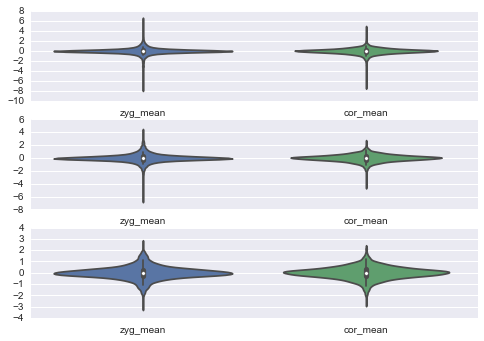

base: 0ms-1000ms
baseline subtraction
no outlier detection
base: 0ms-1000ms
baseline subtraction
base: 0ms-1000ms
baseline subtraction


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import preprocess2
import numpy as np
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

axes=(ax1, ax2, ax3)
c=0
for a in axes:
    outlier=['orig', 'sd', 'iq']
    
    df, zyg_b, cor_b, zyg_s, cor_s, scl_s,  scl_b, fragebogen, MET_num, MET_cat=preprocess2.get_data(base=2, zstand=1, 
                                                           method='subtraction',resolution=100, 
                                                           outl=outlier[c], exclude='yes') 
    df['zyg_mean']=df[zyg_s].mean(axis=1)
    df['cor_mean']=df[cor_s].mean(axis=1)
    sns.violinplot(df[['zyg_mean','cor_mean']], ax=a)
    c=c+1
plt.show()

c=0
for a in axes:
    outlier=['orig', 'sd', 'iq']
    
    df, zyg_b, cor_b, zyg_s, cor_s, scl_s,  scl_b, fragebogen, MET_num, MET_cat=preprocess2.get_data(base=2, zstand=1, 
                                                           method='subtraction',resolution=100, 
                                                           outl=outlier[c], exclude='yes') 
    df['zyg_mean_oo']=df[zyg_s].mean(axis=1)
    df['cor_mean_oo']=df[cor_s].mean(axis=1)
    df['zyg_mean_oo']=df['zyg_mean_oo'][np.abs(df['zyg_mean_oo']-np.mean(df['zyg_mean_oo']))<3*np.std(df['zyg_mean_oo'])]
    df['cor_mean_oo']=df['cor_mean_oo'][np.abs(df['cor_mean_oo']-np.mean(df['cor_mean_oo']))<3*np.std(df['cor_mean_oo'])]
    sns.violinplot(df[['zyg_mean_oo','cor_mean_oo']], ax=a)
    c=c+1
plt.show()

fig.savefig('outlier.png')

In [4]:
#Plots: positive negative und die beiden Muskeln (oder Mimikry)
#Graphik für EMG und

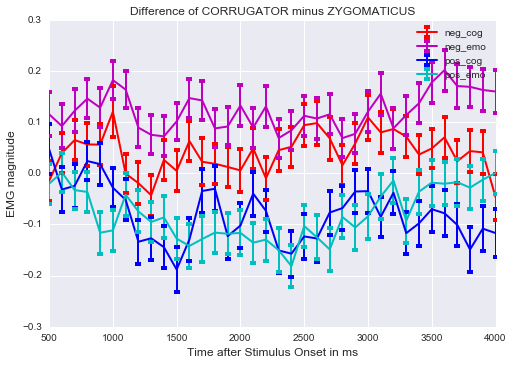

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#df=df.fillna(method='ffill')
def mim_muscle_graph(dfA, item):
    group2='triggers'
    # Zygomaticus and Corrugator grouped by Trigger (averaged over participants and items)
    fig, (ax1) = plt.subplots(1,1)
    #fig.tight_layout()
    df_mimA=pd.DataFrame(np.array(dfA[cor_s])-np.array(dfA[zyg_s]))
    #group2='gender'
    #df_mimA=dfA[scl_s]
    groups= df_mimA.groupby(dfA[group2])
    
    color=['r', 'm', 'b', 'c']    
    i=0
    for name, group in groups:
        #ax1.plot(np.transpose(np.array(group.mean())), linewidth=2.0, linestyle="-", color=color[i], label=name)
        y=np.transpose(np.array(group.mean()))
        x=np.arange(0,(len(y)))
        error=stats.sem(group, nan_policy='omit')#’}, optional
        ax1.errorbar(x, y, error, ms=20, mew=4, linewidth=2.0, linestyle="-",  color=color[i], label=name)
        i=i+1
    ax1.set_title('Difference of CORRUGATOR minus ZYGOMATICUS')
    #ax1.set_ylim([-0.5,0.5])
    ax1.set_xlabel('Time after Stimulus Onset in ms', fontsize=12.0)
    ax1.set_ylabel('EMG magnitude', fontsize=12.0)
    ax1.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )
    ax1.legend()#bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    import matplotlib.image as mpimg
    #image = mpimg.imread('pics/' + item)
    ax2.axis('off')
    #ax2.imshow(image)
    plt.show() 
    fig.savefig('mimicry.png')
    

mim_muscle_graph(df,item='all')
#for i in np.unique(df.pic):
#    mim_muscle_graph(df[df.pic==i], item=i)

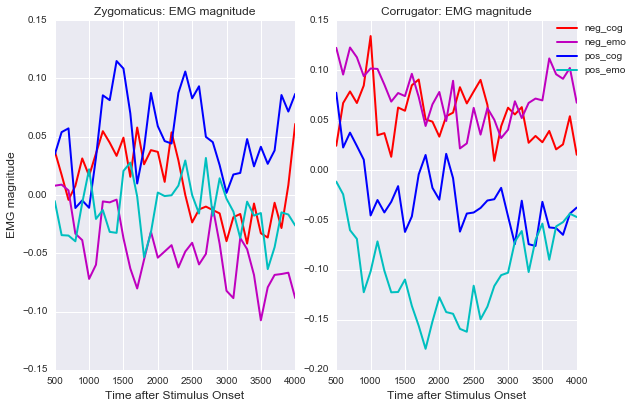

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def muscle_graph(df, zyg_s, cor_s, group2, errors=False, filename='art.png'):
    # Zygomaticus and Corrugator grouped by Trigger (averaged over participants and items)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.tight_layout()

    
    groups= df.groupby([group2])
    
    color=['r', 'm', 'b', 'c']  
    
    i=0
    for name, group in groups:
        if errors==False:
            ax1.plot(np.transpose(np.array(group[zyg_s].mean())), linewidth=2.0, linestyle="-", color=color[i], label=name)
        else: 
            y=np.transpose(np.array(group[zyg_s].mean()))
            x=np.arange(0,(len(y)))
            error=stats.sem(group[zyg_s], nan_policy='omit')#’}, optional
            ax1.errorbar(x, y, error, ms=20, mew=4, linewidth=2.0, linestyle="-",  color=color[i], label=name)
        i=i+1
    ax1.set_title('Zygomaticus: EMG magnitude')
    #ax1.set_ylim([-0.5,0.5])
    ax1.set_xlabel('Time after Stimulus Onset', fontsize=12.0)
    ax1.set_ylabel('EMG magnitude', fontsize=12.0)
    
    ax1.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )

    i=0
    
    groups= df.groupby([group2])
    for name, group in groups:
        if errors==False:
            ax2.plot(np.transpose(np.array(group[cor_s].mean())), linewidth=2.0, linestyle="-", color=color[i], label=name)
        else:
            y=np.transpose(np.array(group[cor_s].mean()))
            x=np.arange(0,(len(y)))
            error=stats.sem(group[cor_s], nan_policy='omit')
            ax2.errorbar(x, y, error, ms=20, mew=4, linewidth=2.0, linestyle="-", color=color[i], label=name)
        i=i+1
    
    plt.title('Corrugator: EMG magnitude')
    #ax2.set_ylim([-0.5,0.5])
    ax2.set_xlabel('Time after Stimulus Onset', fontsize=12.0)
    
    ax2.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )
    ax2.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    
    plt.show()
    
    fig.savefig(filename)
    
muscle_graph(df,  zyg_s, cor_s, group2='triggers', filename='trigger.png')



Ergebnisse der Experimente (Root mean squared error)
o	AUC-Kurve
o	Vergleich der Classifier
o	Vergleich der verschiedenen Empathie-Werte

## Graphics

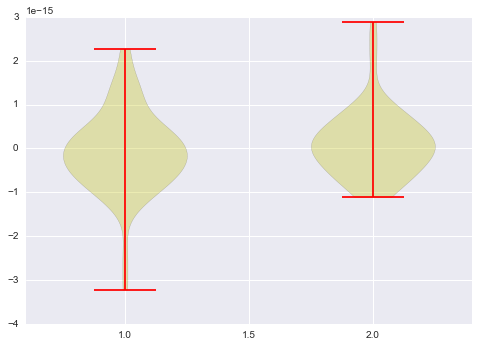

In [7]:
import numpy as np
df_vpn=df.groupby('vpn').mean()
df_vpn['ZYG_SUM']=np.sum(df_vpn[zyg_s], axis=1)
df_vpn['COR_SUM']=np.sum(df_vpn[cor_s], axis=1)
    
zyg=df_vpn.ZYG_SUM
cor=df_vpn.COR_SUM
plt.violinplot([cor, zyg])
plt.show()

### Graphics of Distribution of Questionaire-Values

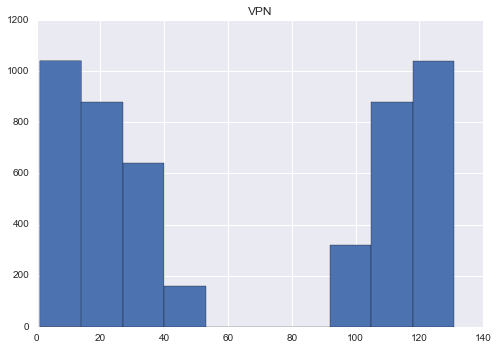

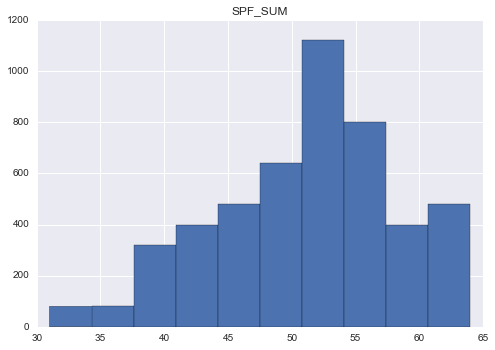

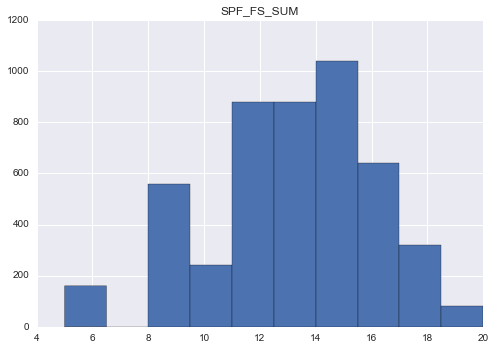

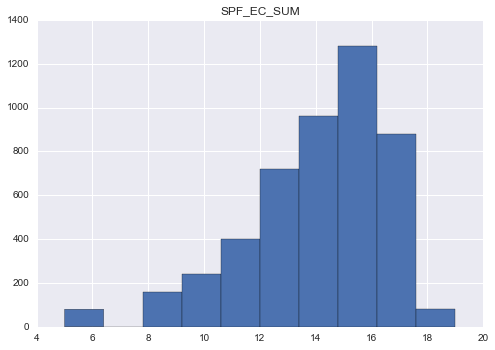

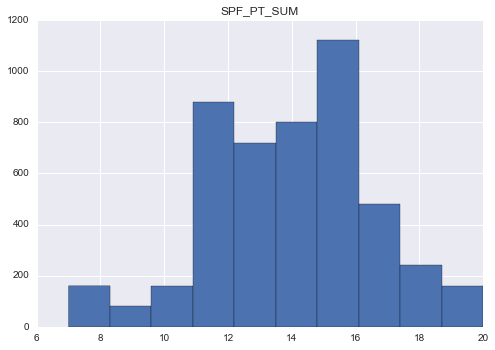

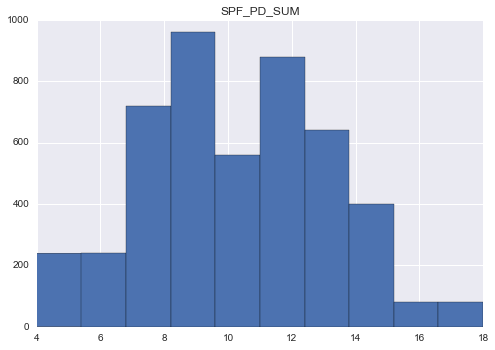

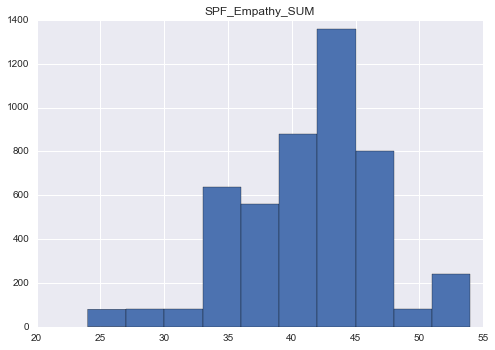

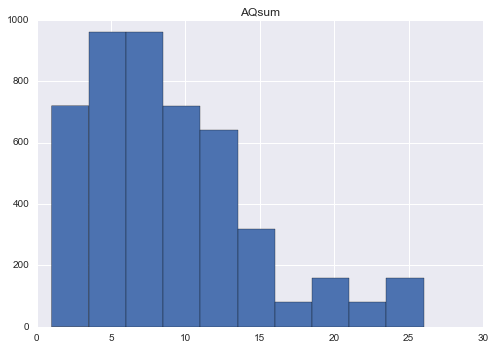

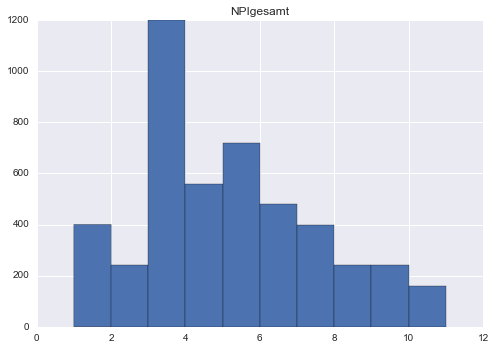

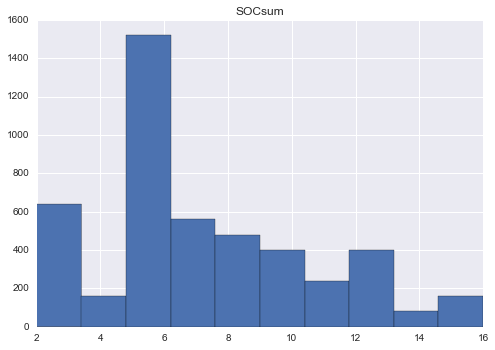

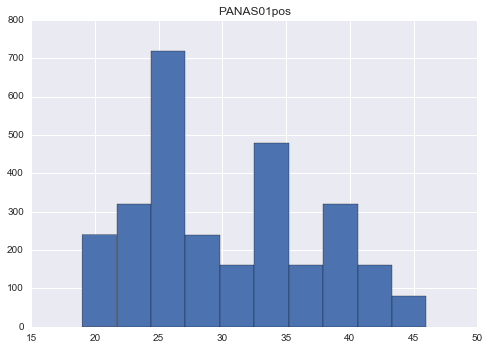

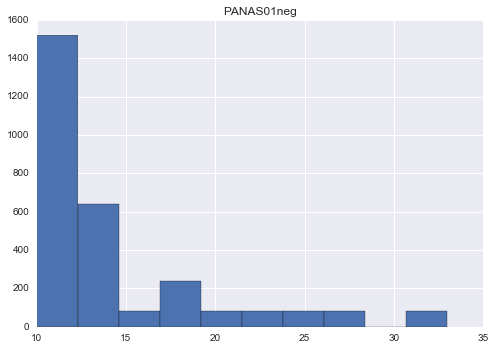

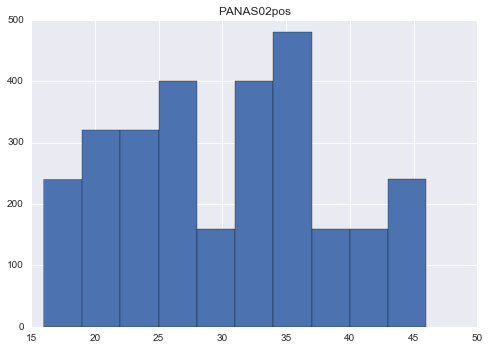

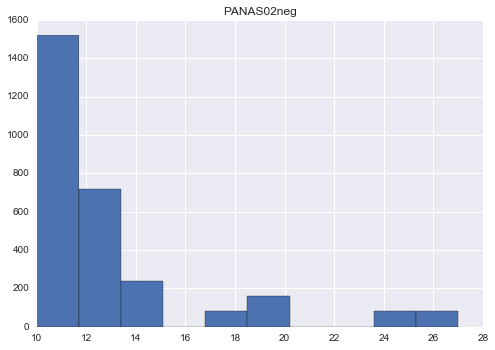

In [8]:
import matplotlib.pyplot as plt

for item in df[fragebogen].columns:
    df=df[df[item]>0]
    df[item].value_counts()
    plt.hist(df[item])
    plt.title(item)
    plt.show()

# Function for Mimicry Graph

In [9]:
def mimgraph(df, group1, group2, threshold=1000000, idx='all', ide=1, errorbars=False, filename='Mimicry.png'):
    import matplotlib.pyplot as plt

    if len(set(df[group1].values))==4:
        fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharey=True, sharex=True)
        ax=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
        ax1.set_ylabel('EMG', fontsize=10.0)
        ax3.set_ylabel('EMG', fontsize=10.0)
        ax5.set_ylabel('EMG', fontsize=10.0)
        ax7.set_ylabel('EMG', fontsize=10.0)
        ax7.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )
        ax8.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )
        ax7.set_xlabel('Time after Stimulus Onset in ms', fontsize=10.0)
        ax8.set_xlabel('Time after Stimulus Onset in ms', fontsize=10.0)
        fig.tight_layout() 

    if len(set(df[group1].values))==2:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True)
        ax3.set_ylabel('EMG', fontsize=10.0)
        ax3.set_xlabel('Time after Stimulus Onset in ms', fontsize=10.0)  
        ax1.set_ylabel('EMG', fontsize=10.0)
        ax4.set_xlabel('Time after Stimulus Onset in ms', fontsize=10.0)  
        ax3.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )
        ax4.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )
        ax=[ax1, ax2, ax3, ax4]
        fig.tight_layout() 

    i=0
    for trigger in set(df[group1].values):
        groups= df.loc[(df[group1]==trigger)&(df[idx]==ide)][zyg_s].groupby(df[group2])  
        a=0
        for name, group in groups:
            a=a+1
            if a>threshold:
                break
            y=np.transpose(np.array(group.mean()))
            x=np.arange(0,(len(y)))
            error=stats.sem(group)
            if errorbars==True:
                ax[i].errorbar(x, y, error, ms=20, mew=4, linewidth=2.0, linestyle="-", label=name)
            else:
                ax[i].plot(y, linewidth=2.0, linestyle="-", label=name)
        ax[i].set_title(trigger + '(ZYG)')
        #ax[i].set_ylim([-0.5,0.5])
        i=i+1
    
        groups= df.loc[(df[group1]==trigger)&(df[idx]==ide)][cor_s].groupby(df[group2])
        a=0
        for name, group in groups:
            a=a+1
            if a>threshold:
                break
            y=np.transpose(np.array(group.mean()))
            x=np.arange(0,(len(y)))
            error=stats.sem(group)
            if errorbars==True:
                ax[i].errorbar(x, y, error, ms=20, mew=4, linewidth=2.0, linestyle="-", label=name)
            else:
                ax[i].plot(y, linewidth=2.0, linestyle="-", label=name)
        ax[i].set_title(trigger+ '(COR)')
        #ax[i].set_ylim([-0.5,0.5])
        i=i+1
        
    plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9)
    plt.show()    
    fig.savefig(filename)

### For each participant his/her averaged Muscle Activity to each trigger

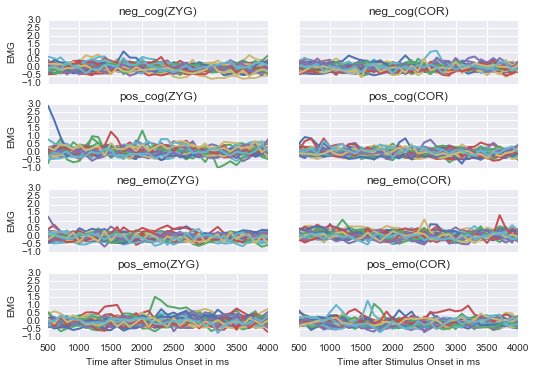

In [10]:
group1='triggers'
group2='vpn'
mimgraph(df, group1, group2, errorbars=False, filename='all participants.png')

## Twenty Pics

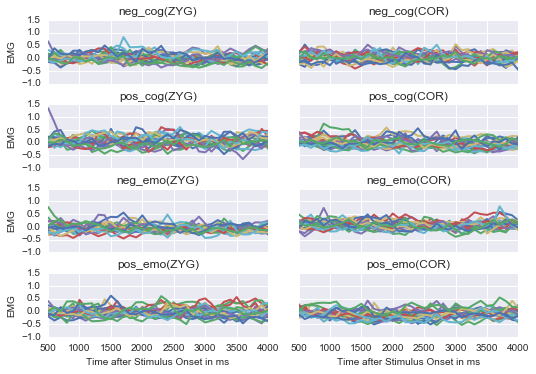

In [11]:
group1='triggers'
group2='pic'
mimgraph(df, group1, group2, threshold=20, idx='all', ide=1, errorbars=False)

##### For each Pic his/her averaged Muscle Activity (split by pos/neg)

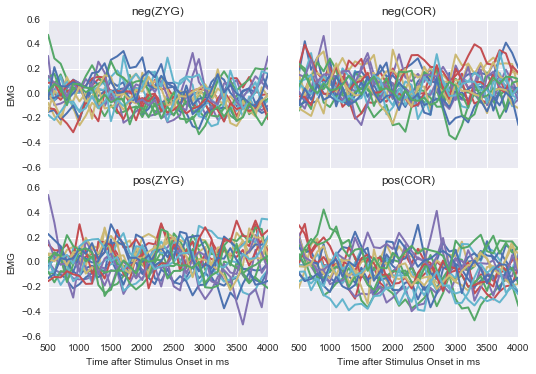

In [12]:
group1='val'
group2='pic'
mimgraph(df, group1, group2, threshold=10000000, idx='all', ide=1, filename='all_pics_valence.png')

## Every single particular pic and its response (with different stand)

In [13]:
#df, zyg_b, cor_b, zyg_s, cor_s, _, _, _=get_data(base=2, zstand=1, high=0)
import numpy as np
import preprocess
import pandas as pd
def individual_graph_prep(column, filename='standard.png'):

    #No-Baseline    
    df0, zyg_b, cor_b, zyg_s, cor_s, _, _, _, _=preprocess.get_data(method='raw', zstand=0, resolution=100)
    #No-Baseline with z-stand
    df1, zyg_b, cor_b, zyg_s, cor_s, _, _, _, _=preprocess.get_data(method='raw', zstand=1, resolution=100)
    #Substraction
    df2, zyg_b, cor_b, zyg_s, cor_s, _, _, _, _=preprocess.get_data(method='subtraction', zstand=1, resolution=100)
    #Division
    df3, zyg_b, cor_b, zyg_s, cor_s, _, _, _, _=preprocess.get_data(method='division', zstand=0, resolution=100)

    #%matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    index=set(df1[column].values)
    print index
    for item in index:
        
        
        fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True)
        fig.tight_layout() 
        print item
        ax1.locator_params(nbins=3, axis='y')
        #plt.locator_params(nbins=10)
        
        zyg0= df0.loc[(df1[column]==item)][zyg_s]  
        cor0= df0.loc[(df1[column]==item)][cor_s]  
        
        zyg1= df1.loc[(df1[column]==item)][zyg_s]  
        cor1= df1.loc[(df1[column]==item)][cor_s]    
    
        zyg2= df2.loc[(df2[column]==item)][zyg_s]   
        cor2= df2.loc[(df2[column]==item)][cor_s]   
    
        zyg3= df3.loc[(df3[column]==item)][zyg_s]    
        cor3= df3.loc[(df3[column]==item)][cor_s]   
        
        ax0.plot(np.transpose(np.array(zyg0.mean())), linewidth=2.0, linestyle="-", label='zyg')
        ax0.plot(np.transpose(np.array(cor0.mean())), linewidth=2.0, linestyle="-", label='cor')
        ax0.locator_params(nbins=2, axis='y')
        #ax1.set_ylim([-1,1])
        #valence=np.array(df[(df[column]==picture)]['val'])
        ax0.set_title('original')
        
        ax1.plot(np.transpose(np.array(zyg1.mean())), linewidth=2.0, linestyle="-", label='zyg')
        ax1.plot(np.transpose(np.array(cor1.mean())), linewidth=2.0, linestyle="-", label='cor')
        ax1.locator_params(axis='y', nbins=2)
        #ax1.set_ylim([-1,1])
        #valence=np.array(df[(df[column]==picture)]['val'])
        ax1.set_title('with z-stand')
        #ax1.set_xlabel(valence[1], fontsize=12.0)
        ax1.set_ylabel('EMG magnitude', fontsize=12.0)
        ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        #ax1.tick_params(axis='x',which='mayor',length=2, labelsize=10)
        
        ax2.plot(np.transpose(np.array(zyg2.mean())), linewidth=2.0, linestyle="-", label='zyg')
        ax2.plot(np.transpose(np.array(cor2.mean())), linewidth=2.0, linestyle="-", label='cor')
        ax2.set_title('substraction of base with z-stand')
        ax2.locator_params(nbins=3, axis='y')
        
        ax3.plot(np.transpose(np.array(zyg3.mean())), linewidth=2.0, linestyle="-", label='zyg')
        ax3.plot(np.transpose(np.array(cor3.mean())), linewidth=2.0, linestyle="-", label='cor')
        ax3.set_title('division of base without z-stand')
        ax3.locator_params(nbins=3, axis='y')  
        
        ax3.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )

        #image = mpimg.imread('pics/' + item)
        #ax4.axis('off')
        #ax4.imshow(image)
        
        plt.subplots_adjust(bottom=0., right=0.9, top=0.9)
        plt.show()
        fig.savefig(filename)

base: 0ms-500ms
raw data
base: 0ms-500ms
raw data
base: 0ms-500ms
baseline subtraction


C:\Users\User\Anaconda2\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


base: 0ms-500ms
baseline division
set(['neg', 'pos'])
neg


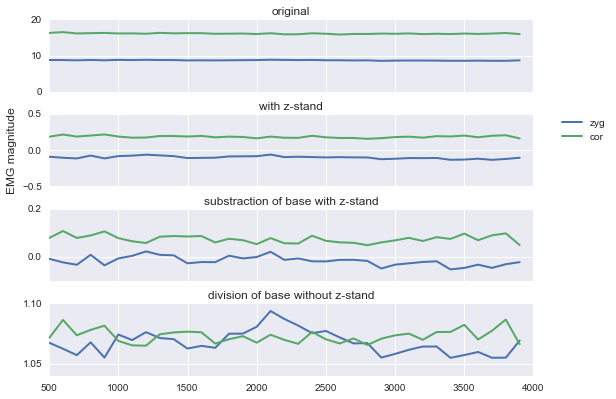

pos


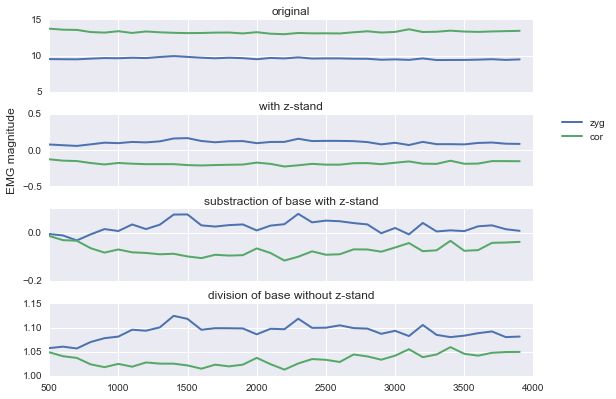

In [14]:
#individual_graph_prep('pic')
#individual_graph_prep('vpn')

individual_graph_prep('val')

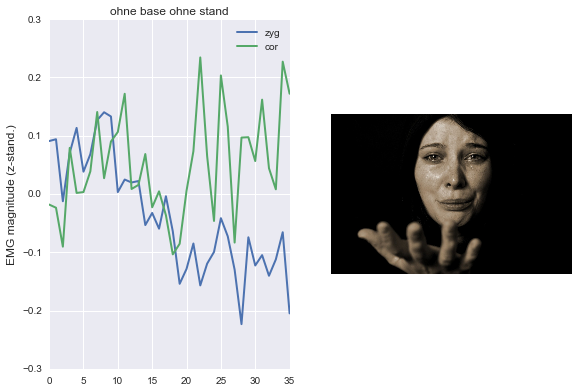

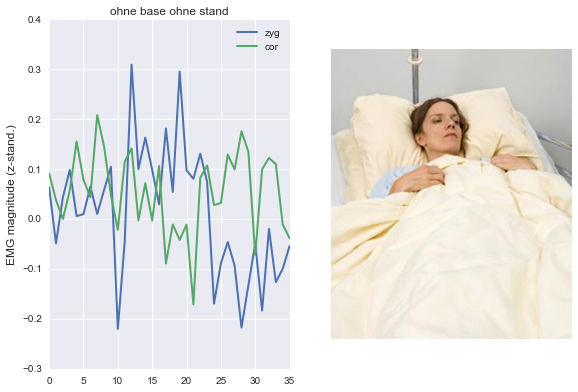

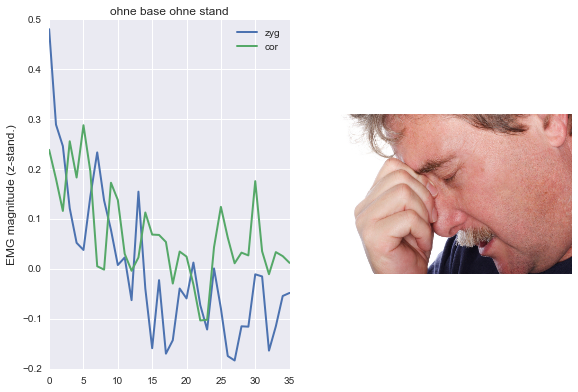

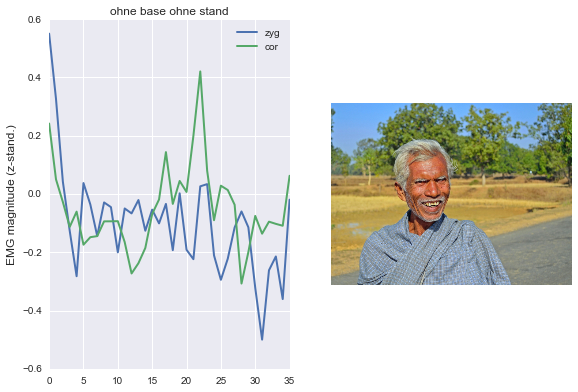

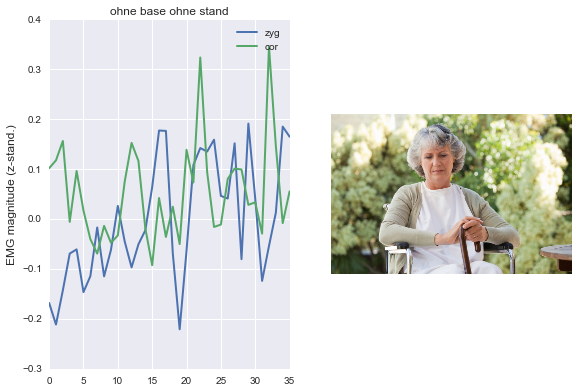

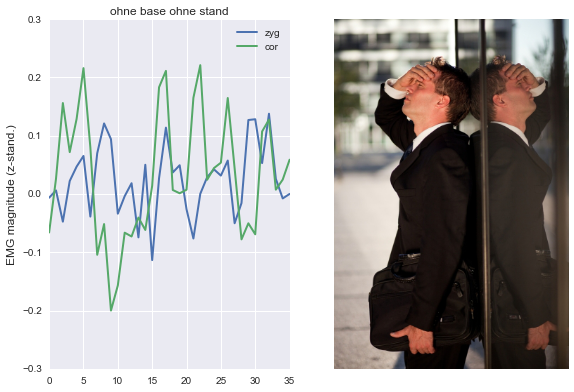

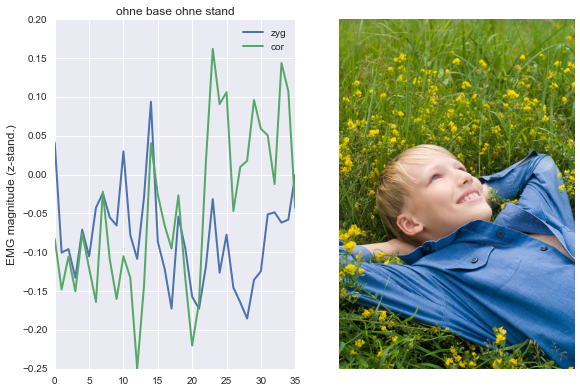

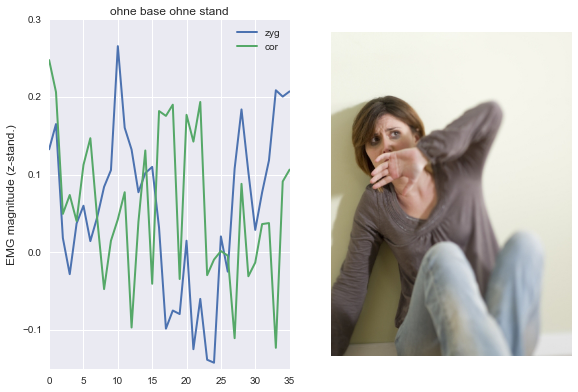

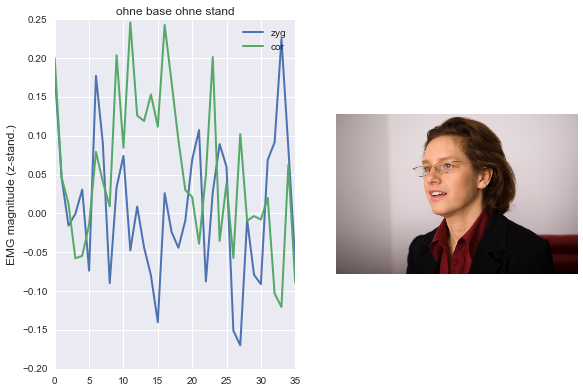

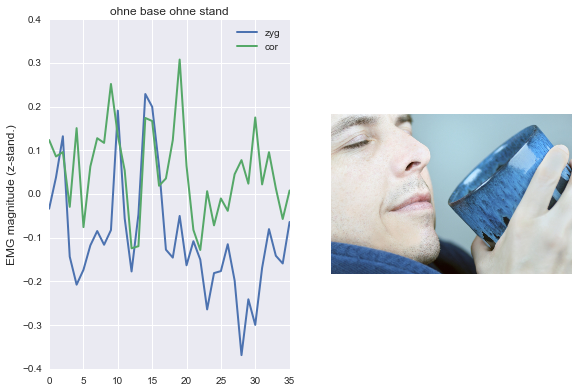

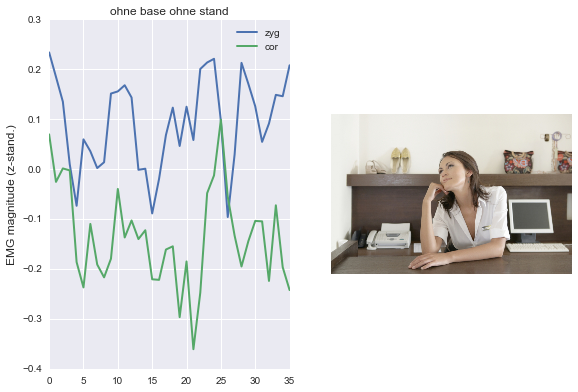

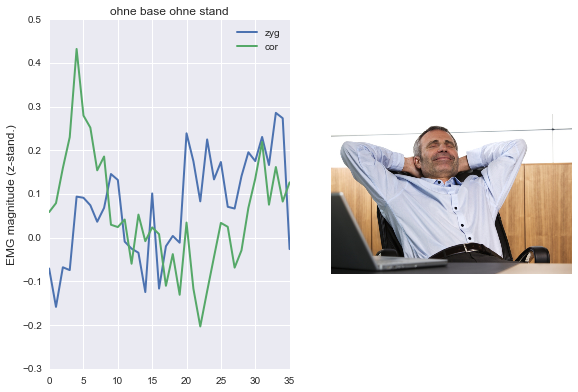

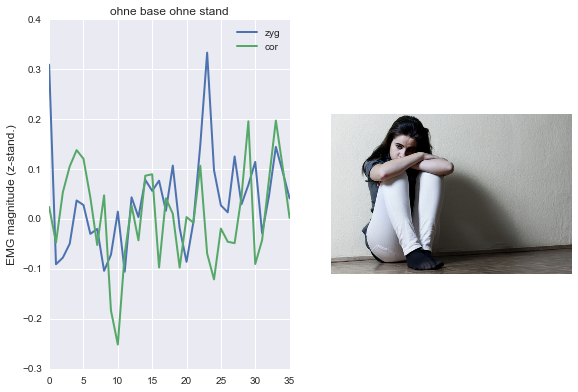

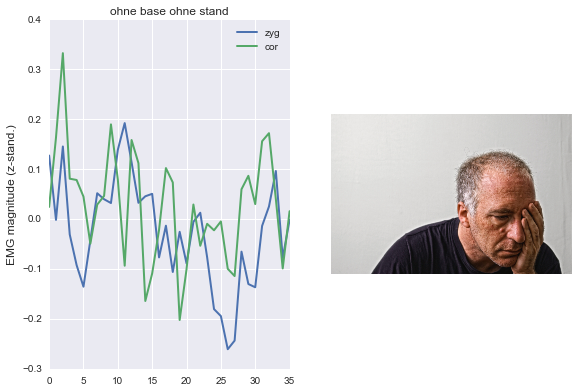

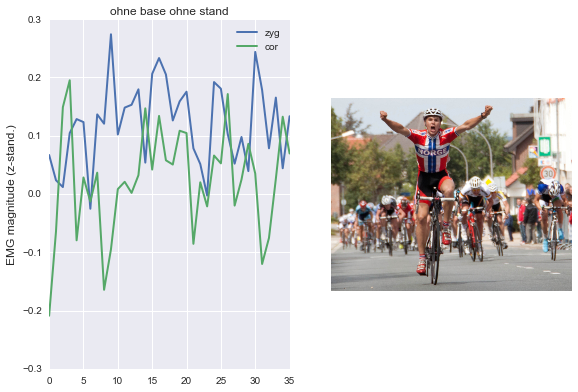

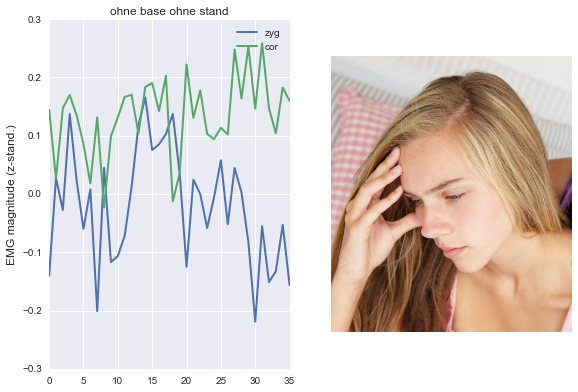

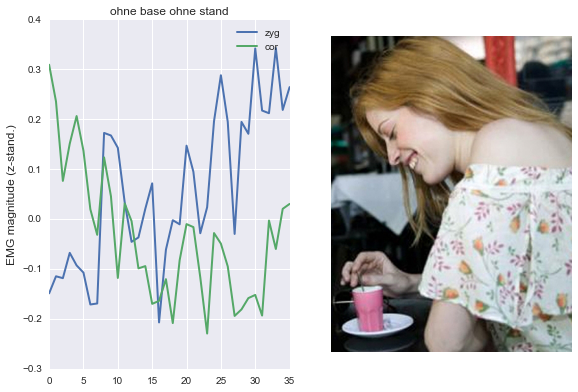

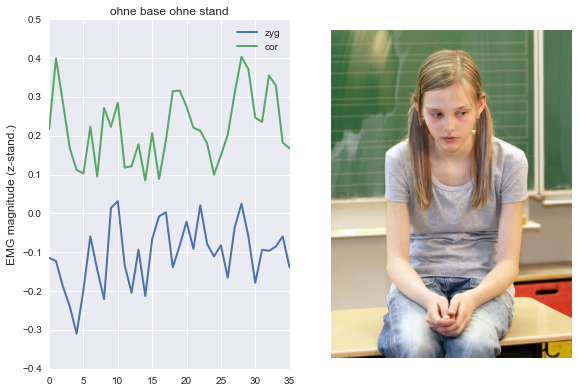

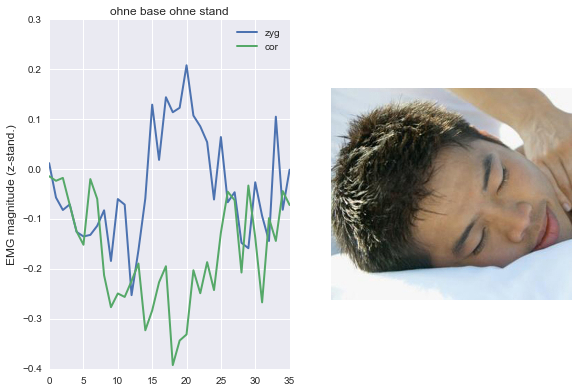

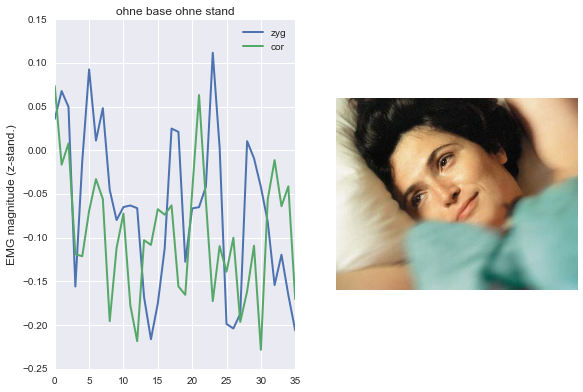

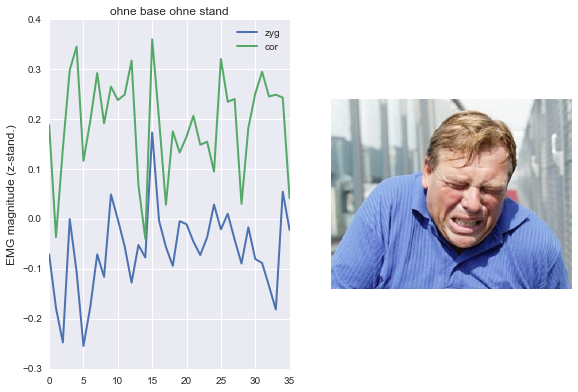

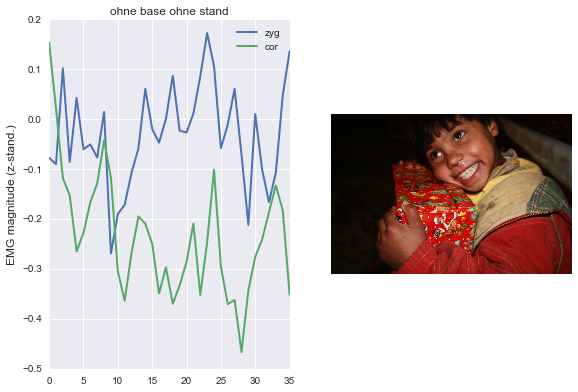

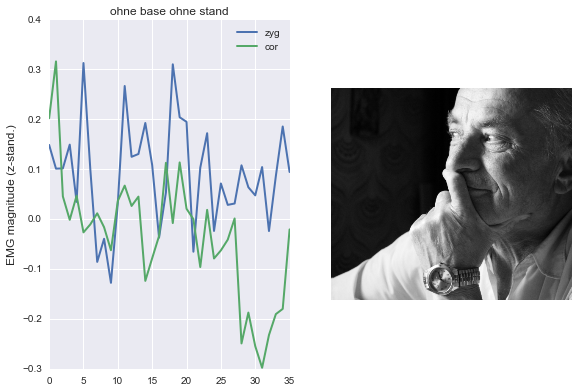

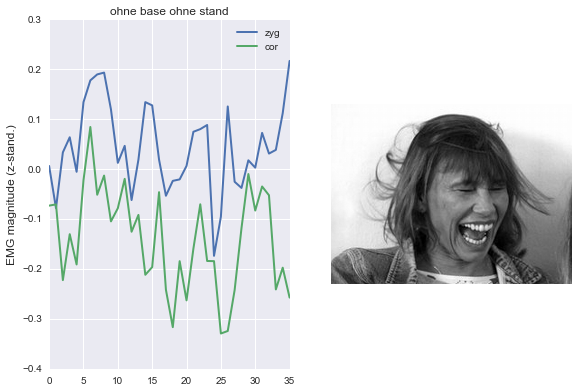

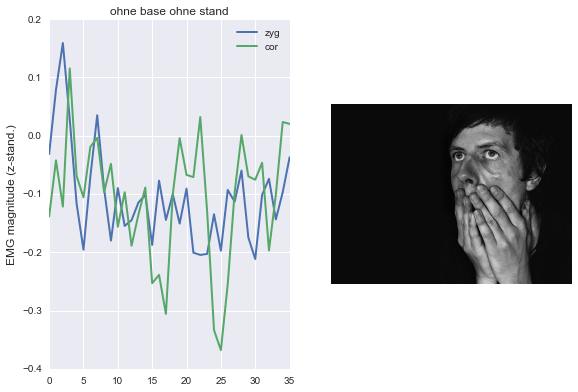

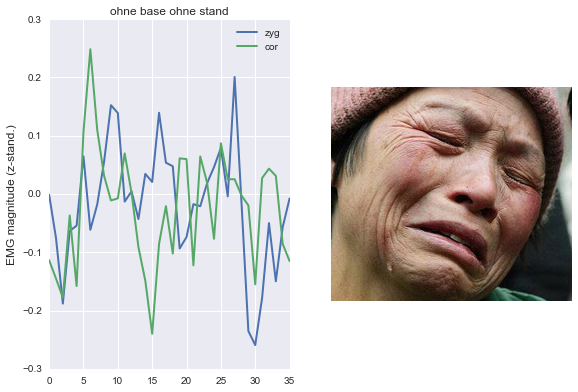

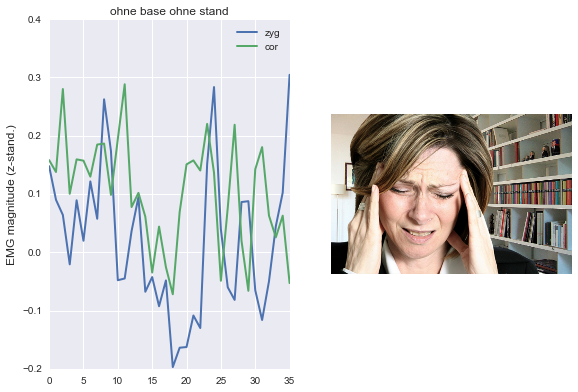

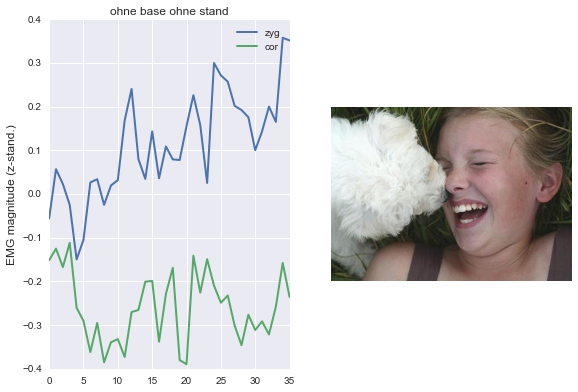

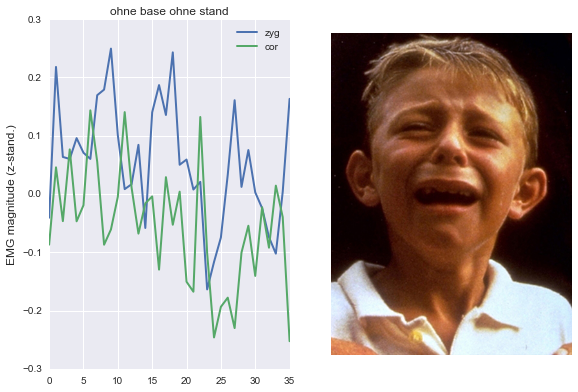

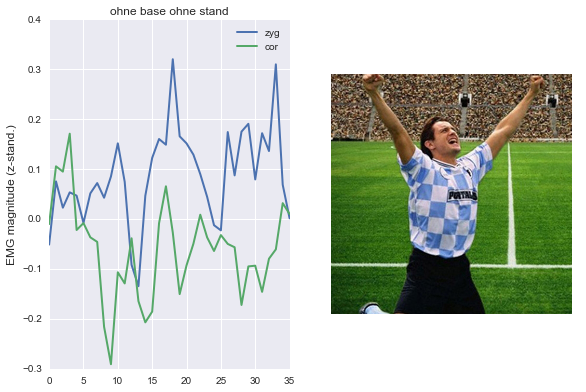

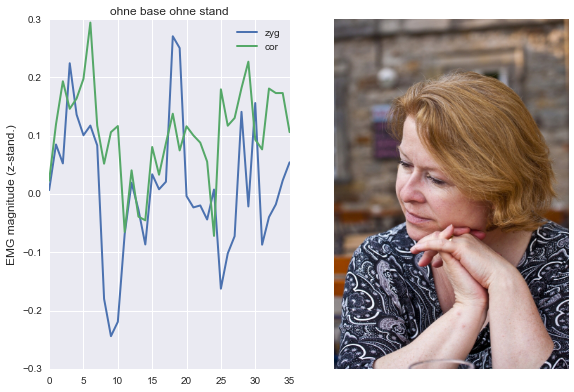

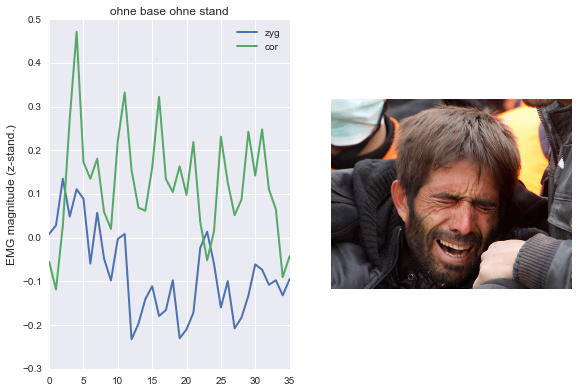

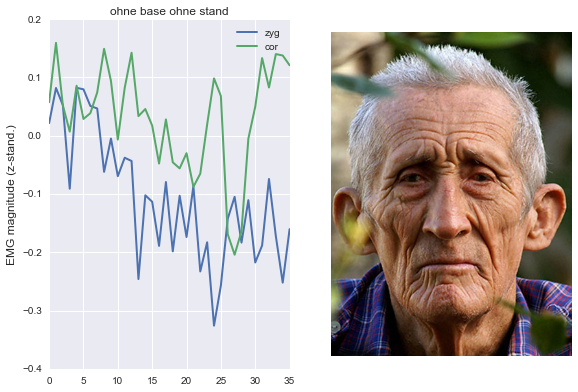

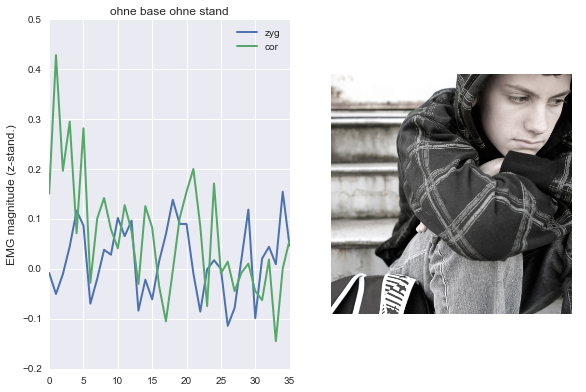

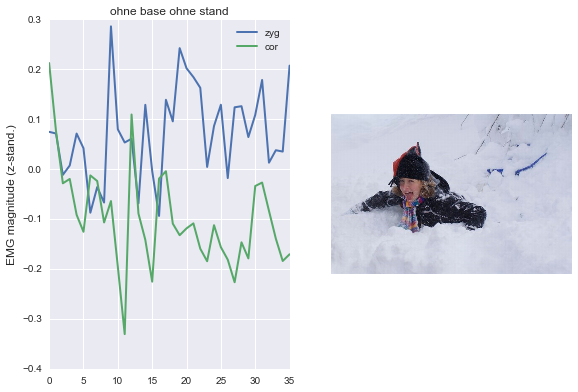

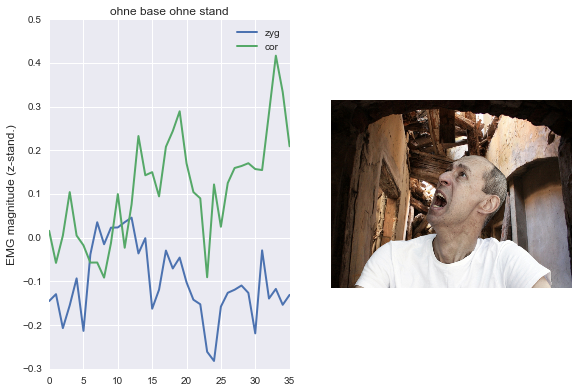

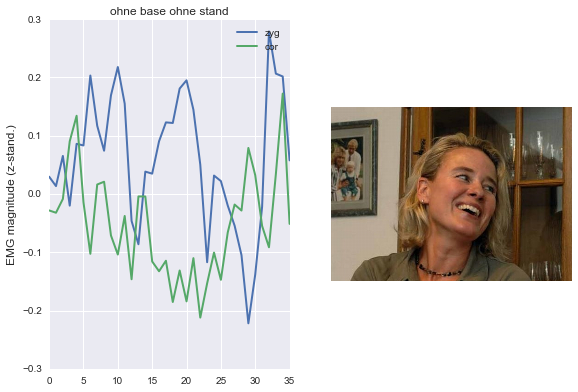

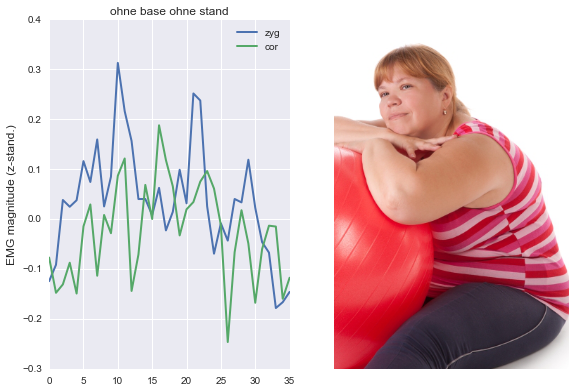

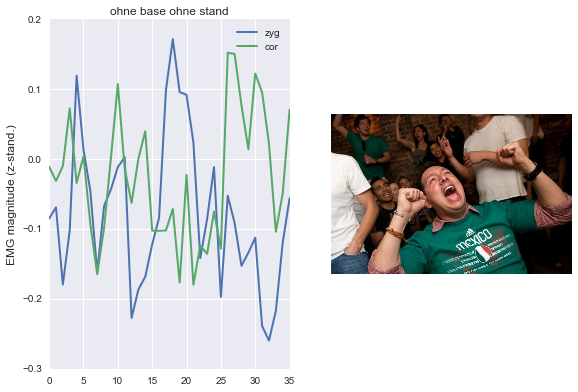

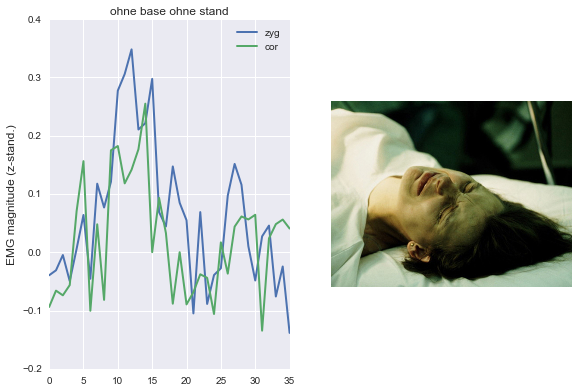

In [15]:
#df, zyg_b, cor_b, zyg_s, cor_s, _, _, _=get_data(base=2, zstand=1, high=0)

def individual_graph(df, column):
    #%matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    index=set(df[column].values)
    for item in index:
        fig, ((ax1, ax2)) = plt.subplots(1, 2)
        fig.tight_layout() 

        zyg= df.loc[(df[column]==item)][zyg_s]        
        cor= df.loc[(df[column]==item)][cor_s] 

        ax1.plot(np.transpose(np.array(zyg.mean())), linewidth=2.0, linestyle="-", label='zyg') 
        ax1.plot(np.transpose(np.array(cor.mean())), linewidth=2.0, linestyle="-", label='cor')
        #ax1.set_ylim([-1,1])
        #valence=np.array(df[(df[column]==picture)]['val'])
        ax1.set_title('ohne base ohne stand')
        #ax1.set_xlabel(valence[1], fontsize=12.0)
        ax1.set_ylabel('EMG magnitude (z-stand.)', fontsize=12.0)
        ax1.legend() 
        
        image = mpimg.imread('pics/' + item)
        ax2.axis('off')
        ax2.imshow(image)
        
        plt.show()
        
column='pic'
individual_graph(df, column)

## Graphics for Fragebogen and MET-Values

averaged above participants


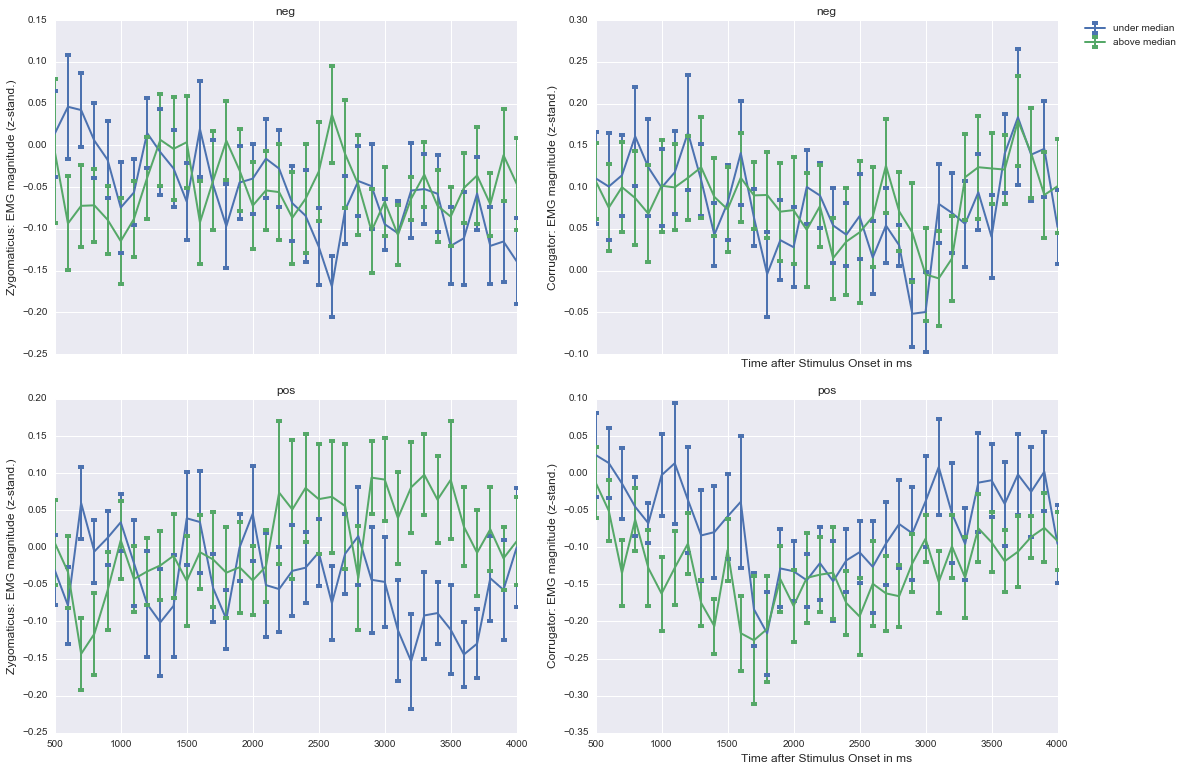

In [16]:
import matplotlib.pyplot as plt
print 'averaged above participants'
def METgraph(df, items, scale='int', errorbars=True):
    for item in df[items].columns:
        df=df[df[item]>0]
        #plt.figure(figsize=(8, 6), dpi=80)
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
        #fig.suptitle(item, fontsize=20)
        fig.tight_layout() 
        ax=[ax1, ax2, ax3, ax4]
        i=0
        for valence in set(df['val'].values):

            if scale=='categorical':
                groups= df[df['val']==valence][zyg_s].groupby(df[item])
            else:  
                med=np.median(df.groupby(df['vpn']).mean()[item])
                groups= df[df['val']==valence][zyg_s].groupby(df['vpn']).mean().groupby(df[item].groupby(df['vpn']).mean()>med)
            
            for name, group in groups:
                y=np.transpose(np.array(group.mean()))
                x=np.arange(0,(len(y)))
                error=stats.sem(group, nan_policy='omit')
                if errorbars==True:
                    ax[i].errorbar(x, y, error, ms=20, mew=4, linewidth=2.0, linestyle="-", label=name)
                else:
                    ax[i].plot(y, linewidth=2.0, linestyle="-", label=name)

            ax[i].set_title(valence)
            ax[i].set_ylabel('Zygomaticus: EMG magnitude (z-stand.)', fontsize=12.0)
            #ax[i].set_ylim([-0.3,0.3])
            i=i+1

            if scale=='categorical':
                groups= df[df['val']==valence][cor_s].groupby(df['vpn']).mean()
            else:
                med=np.median(df[item].groupby(df['vpn']).mean())
                groups= df[df['val']==valence][cor_s].groupby(df['vpn']).mean().groupby(df[item].groupby(df['vpn']).mean()>med)
            for name, group in groups:          
                y=np.transpose(np.array(group.mean()))
                x=np.arange(0,(len(y)))
                error=stats.sem(group, nan_policy='omit')
                if errorbars==True:
                    ax[i].errorbar(x, y, error, ms=20, mew=4, linewidth=2.0, linestyle="-", label=name)
                else:
                    ax[i].plot(y, linewidth=2.0, linestyle="-", label=name)
            #ax[i].legend()
            ax2.legend(['under median','above median'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            ax[i].set_title(valence)
            ax[i].set_xlabel('Time after Stimulus Onset in ms', fontsize=12.0)
            ax[i].set_ylabel('Corrugator: EMG magnitude (z-stand.)', fontsize=12.0)   
            ax4.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )
            #ax[i].set_ylim([-0.3,0.3])
            i=i+1
        
        plt.subplots_adjust(bottom=0.1, right=1.8, top=1.9)
        plt.show()
        fig.savefig('key.png')
#METgraph(df, items=fragebogen)


METgraph(df[df.con==2].reset_index(drop=True), items=['key'])

not averaged above participants


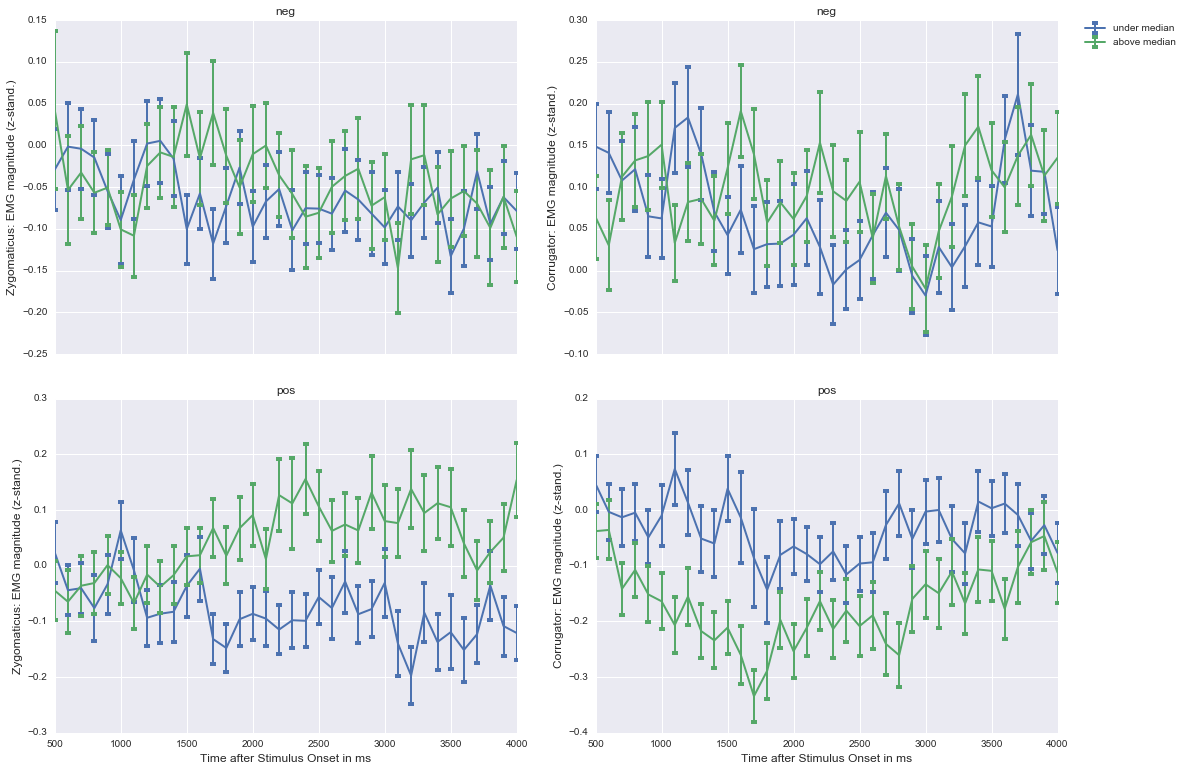

In [17]:
import matplotlib.pyplot as plt
print 'not averaged above participants'
def METgraph(df, items, scale='int', errorbars=True):
    for item in df[items].columns:
        df=df[df[item]>0]
        #plt.figure(figsize=(8, 6), dpi=80)
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
        #fig.suptitle(item, fontsize=10)
        fig.tight_layout() 
        ax=[ax1, ax2, ax3, ax4]
        i=0
        for valence in set(df['val'].values):

            if scale=='categorical':
                groups= df[df['val']==valence][zyg_s].groupby(df[item])
            else:
                groups= df[df['val']==valence][zyg_s].groupby(df[item]>np.median(df[item]))
            for name, group in groups:

                y=np.transpose(np.array(group.mean()))
                x=np.arange(0,(len(y)))
                error=stats.sem(group, nan_policy='omit')
                if errorbars==True:
                    ax[i].errorbar(x, y, error, ms=20, mew=4, linewidth=2.0, linestyle="-", label=name)
                else:
                    ax[i].plot(y, linewidth=2.0, linestyle="-", label=name)

            ax[i].set_title(valence)
            ax3.set_xlabel('Time after Stimulus Onset in ms', fontsize=12.0)
            ax[i].set_ylabel('Zygomaticus: EMG magnitude (z-stand.)', fontsize=12.0)
            #ax[i].set_ylim([-0.3,0.3])
            i=i+1

            if scale=='categorical':
                groups= df[df['val']==valence][cor_s].groupby(df[item])
            else:
                groups= df[df['val']==valence][cor_s].groupby(df[item]>np.median(df[item]))
                
            for name, group in groups:          
                y=np.transpose(np.array(group.mean()))
                x=np.arange(0,(len(y)))
                error=stats.sem(group, nan_policy='omit')
                if errorbars==True:
                    ax[i].errorbar(x, y, error, ms=20, mew=4, linewidth=2.0, linestyle="-", label=name)
                else:
                    ax[i].plot(y, linewidth=2.0, linestyle="-", label=name)
            
            ax2.legend(['under median','above median'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            ax[i].set_title(valence)
            ax4.set_xlabel('Time after Stimulus Onset in ms', fontsize=12.0)
            ax[i].set_ylabel('Corrugator: EMG magnitude (z-stand.)', fontsize=12.0)
            ax4.set_xticklabels(['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000'] )
            #ax[i].set_ylim([-0.3,0.3])
            i=i+1
        
        plt.subplots_adjust(bottom=0.1, right=1.8, top=1.9)
        plt.show()


METgraph(df[df.con==2].reset_index(drop=True), items=['key'])